In [1]:
import os
import sys
import time
import matplotlib as pl
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from itertools import product
import pickle
import random
from FunGenerator import FunGenerator
import tensorflow as tf
from maml1 import MAML
from tensorflow.python.platform import flags

WARN: Cannot define MaxPoolGrad, likely already defined for this version of tensorflow: "Registering two gradient with name 'MaxPoolGrad' !(Previous registration was in <module> /home/rspace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16)"


In [ ]:
datasource = 'sinusoid'
num_classes = 1
baseline = None
pretrain_iterations = 0
metatrain_iterations = 70000
meta_batch_size =25
meta_lr = 0.001
update_batch_size = 10
update_lr = 1e-3
num_updates = 1
norm = None
stop_grad = False
log_flag = True
logdir = 'logs/sine'
resume = True
train_flag = True
test_iter = -1
test_set = False
train_update_batch_size = -1
train_update_lr = -1

In [10]:
dg = FunGenerator(num_pts=100, batch_size=1, randomize=False)
#print(dir(dg))
#print(dg.batch_size)
#print(dg.input_range)
print(dg.Grid)

     w1   w2       ph1       ph2
0   1.0  3.0  0.314159  1.256637
1   1.0  3.0  0.314159  1.780236
2   1.0  3.0  0.314159  2.303835
3   1.0  3.0  0.314159  2.827433
4   1.0  3.0  0.837758  1.256637
5   1.0  3.0  0.837758  1.780236
6   1.0  3.0  0.837758  2.303835
7   1.0  3.0  0.837758  2.827433
8   1.0  3.0  1.361357  1.256637
9   1.0  3.0  1.361357  1.780236
10  1.0  3.0  1.361357  2.303835
11  1.0  3.0  1.361357  2.827433
12  1.0  3.0  1.884956  1.256637
13  1.0  3.0  1.884956  1.780236
14  1.0  3.0  1.884956  2.303835
15  1.0  3.0  1.884956  2.827433


In [15]:
X1, Y1, _, _ = dg.generate(x_range=[0,1], randomize=False, train=False, add_noise=True, noise_sd=0.2)
print(X1.shape)

(1, 100, 1)


In [8]:
print(Y1)

[[[ 0.09415967]
  [-0.84328635]
  [ 0.67032482]
  [ 0.19035008]
  [-0.02400525]
  [-0.42547343]
  [-0.30514732]
  [ 0.84286773]
  [-0.24438568]
  [ 0.10378459]]]


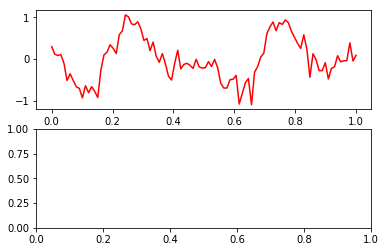

In [16]:
f, ax = plt.subplots(2,1)
ax[0].plot(X1[0], Y1[0], '-', color='red');
#ax[1].plot(X2[2], Y2[2], '-', color='red');
#ax[2].plot(X3[2], Y3[2], '-', color='red');
plt.show()

In [19]:
a = 12
b = 34
fnm = 'hello%d_world%d' % (a, b)
print(fnm)

hello12_world34


In [ ]:
ddt = {'xyz':0.01}
xx = ddt.get('amp_range', [0.1, 5.0])
print(xx)

In [ ]:
# having [] around size
aa = np.random.uniform(0.2, 0.7, [3])
print(aa)
aa1 = np.random.uniform(0.2, 0.7, 3)
print(aa1)

In [ ]:
batch_x, batch_y, amp, phase = dg.generate()
print('x:',batch_x.shape)
print('y:', batch_y.shape)
print(len(amp))
print(len(phase))

In [ ]:
print(batch_x[12,:,0])

In [ ]:
dim_output = dg.dim_output
print(dim_output)
dim_input = dg.dim_input
print(dim_input)
tf_data_load = False
input_tensors = None

In [ ]:
model = MAML(dim_input, dim_output, test_num_updates=test_num_updates)

In [ ]:
model.construct_model(input_tensors=input_tensors, prefix='metatrain_')

In [ ]:
model.summ_op = tf.summary.merge_all()

In [ ]:
saver = loader = tf.train.Saver(tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES), max_to_keep=10)

In [ ]:
sess = tf.InteractiveSession()

In [ ]:
exp_string = 'cls_'+str(num_classes)+'.mbs_'+str(meta_batch_size) + \
  '.ubs_' + str(train_update_batch_size) + '.numstep' + \
    str(num_updates) + '.updatelr' + str(train_update_lr)
print(exp_string)

In [ ]:
resume_itr = 0
model_file = None

tf.global_variables_initializer().run()
tf.train.start_queue_runners()

In [ ]:
aa = 'metatrain'
if 'train' in aa:
    print('yes')

In [ ]:
trend = np.linspace(1, 10, num=5)
print(x1)

In [ ]:
amp_range = [0.1, 5.0]
phase_range = [0, np.pi]
input_range = [-5.0, 5.0]
batch_size = 2
dim_input = 1
dim_output = 1
num_samples_per_class = 5
sigma = 0.1
drift = 0.1

amp = np.random.uniform(amp_range[0], amp_range[1], [batch_size])
phase = np.random.uniform(phase_range[0], phase_range[1], [batch_size])
outputs = np.zeros([batch_size, num_samples_per_class, dim_output])
init_inputs = np.zeros([batch_size, num_samples_per_class, dim_input])

init_inputs[0] = np.random.uniform(input_range[0], input_range[1], [num_samples_per_class, 1])
print('init_input \n', init_inputs[0])

ep = np.random.normal(0.0, sigma, size=[num_samples_per_class,1])
print('ep', ep)

In [ ]:
slp = 1.0
offset = 0
trend = init_inputs[0]*slp + offset
print(trend)

In [ ]:
outputs[0] = amp[0] * np.sin(init_inputs[0] - phase[0]) + trend
print(outputs[0])
xx = np.linspace(-5, 5, num=100)
yy = amp[0] * np.sin(xx - phase[0]) + xx*slp + offset

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(xx, yy, 'o', color='black');
plt.plot(init_inputs[0], outputs[0], 's', color='red');
plt.show()

In [ ]:
xx = np.linspace(-5, 5, num=100)
yy = amp[0] * np.sin(3*xx - 0.5)*np.sin(0.1*xx + 0.1)
plt.plot(xx, yy, 'o', color='black');
plt.show()

In [ ]:
# equivalent of R's seq 
#rr = list(range(3.0, 10.0, step=float((10-3)/5)))
#print(rr) # Noop
rr = np.linspace(3, 10, num=5)
print(rr)

In [ ]:
from itertools import product
import pandas as pd

def expand_grid(dictionary):
   return pd.DataFrame([row for row in product(*dictionary.values())], columns=dictionary.keys())

In [ ]:
w1 = np.linspace(0.1, 2.5, num=4)
w2 = np.linspace(0.1, 2.5, num=4)
ph1 = np.linspace(0.1*np.pi, 0.6*np.pi, num=4)
ph2 = np.linspace(0.4*np.pi, 0.9*np.pi, num=4)
grid_cols = {'w1': w1, 'w2': w2, 'ph1':ph1, 'ph2':ph2}

In [ ]:
Grid = expand_grid(grid_cols)
print(Grid.iloc[:5])
print(Grid.iloc[-5:])

In [ ]:
ix = np.where(Grid['w1']!=Grid['w2'])
print(len(ix[0]))
#print(Grid.iloc[ix])
G2 = Grid.iloc[ix]
print(G2.iloc[3,2])

In [ ]:
dg = FunGenerator(100, 5, 0)
xx, yy, _, _ = dg.generate(0)
print(xx.shape)
print(yy.shape)
xx1, yy1, _, _ = dg.generate(1, 1.0)
xx2, yy2, _, _ = dg.generate(2, 0.5, 0.5, 0.0)
xx3, yy3, _, _ = dg.generate(1, 0.8)

In [ ]:
f, ax = plt.subplots(2,2)
ax[0,0].plot(xx[1], yy[1], 's', color='red');
#ax[0,1].plot(xx1[1], yy1[1], 's', color='red');
#ax[1,0].plot(xx2[1], yy2[1], 's', color='red');
#ax[1,1].plot(xx3[1], yy3[1], 's', color='red');
ax[0,0].set_title('hello')
plt.show()

In [ ]:
dg1 = FunGenerator(100, 5, 1)
xx, yy, G = dg1.generate()
print(xx.shape)
print(yy.shape)
print(G.shape)

In [ ]:
plt.plot(xx[20], yy[20], 's', color='red');
plt.show()

In [ ]:
dg = DataGenerator(20, 5)
xx, yy, amp, phase = dg.generate(train=False, test_amp_rng=[5.0, 6.0], test_offset=2.0)
print(xx.shape)
print(yy.shape)

In [ ]:
f, ax = plt.subplots(2,2)
ax[0,0].plot(xx[0], yy[0], 'o', color='red');
ax[0,1].plot(xx[1], yy[1], 'o', color='red');
ax[1,0].plot(xx[2], yy[2], 'o', color='red');
ax[1,1].plot(xx[3], yy[3], 'o', color='red');
plt.show()

In [ ]:
# this adds a number to a list to make a longer list
a = 1.0
b = [2.0, 3.2, 4.3]
c = [a] + b
print(c)

In [ ]:
dg = FunGenerator(30, 9)
xx, yy, _, _ = dg.generate()
print(xx.shape)
print(yy.shape)
print(subg.shape)

In [ ]:
f, ax = plt.subplots(3,3, sharey=True)
ax[0,0].scatter(xx[0,:,0], yy[0,:,0], marker='o', color='red')
ax[0,1].scatter(xx[1,:,0], yy[1,:,0], marker='o', color='red')
ax[0,2].scatter(xx[2,:,0], yy[2,:,0], marker='o', color='red')
ax[1,0].scatter(xx[3,:,0], yy[3,:,0], marker='o', color='red')
ax[1,1].scatter(xx[4,:,0], yy[4,:,0], marker='o', color='red')
ax[1,2].scatter(xx[5,:,0], yy[5,:,0], marker='o', color='red')
ax[2,0].scatter(xx[6,:,0], yy[6,:,0], marker='o', color='red')
ax[2,1].scatter(xx[7,:,0], yy[7,:,0], marker='o', color='red')
ax[2,2].scatter(xx[8,:,0], yy[8,:,0], marker='o', color='red')
plt.show()

In [ ]:
w1 = np.linspace(0.1, 2.5, num=5)
w2 = np.linspace(0.1, 2.5, num=5)
ph1 = np.linspace(0.1*np.pi, 0.6*np.pi, num=5)
ph2 = np.linspace(0.4*np.pi, 0.9*np.pi, num=5)
grid_cols = {'w1':w1, 'w2':w2, 'ph1':ph1, 'ph2':ph2}
G1 = expand_grid(grid_cols)
ix = np.where(G1['w1'] != G1['w2'])
Grid = G1.iloc[ix]
print(Grid.shape)
print(Grid.iloc[:10,:])

In [ ]:
ix1 = np.random.choice(Grid.shape[0], Grid.shape[0], replace=False)
print(ix1)
Grid = Grid.iloc[ix1]
print(Grid)

In [ ]:
x_data = np.linspace(-5.0, 5.0, 100)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
#y_data = np.square(x_data) - 0.5 + noise
y_data = np.sin(0.2*x_data + 0.1*np.pi)*np.cos(0.8*x_data + 0.3*np.pi) + noise

In [ ]:
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])
print(ys.shape)

In [ ]:
Hn = [23, 37]
W1 = tf.Variable(tf.truncated_normal([1, Hn[0]], stddev=0.01))
W2 = tf.Variable(tf.truncated_normal([Hn[0], Hn[1]], stddev=0.01))
W3 = tf.Variable(tf.truncated_normal([Hn[1], 1], stddev=0.01))
b1 = tf.Variable(tf.zeros([1, Hn[0]]) + 0.1)
b2 = tf.Variable(tf.zeros([1, Hn[1]]) + 0.1)
b3 = tf.Variable(tf.zeros([1, 1]) + 0.1)

H1 = tf.matmul(xs, W1) + b1
A1 = tf.nn.relu(H1)
H2 = tf.matmul(A1, W2) + b2
A2 = tf.nn.relu(H2)
y_hat = tf.matmul(A2, W3) + b3

In [ ]:
print('H1 shape :', H1.shape)
print('H2 shape :', H2.shape)
print('y_hat shape:', y_hat.shape)

In [ ]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - y_hat), axis=0))
train_step = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(loss)

In [ ]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [ ]:
x_data = np.linspace(-5.0, 5.0, 100)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
#y_data = np.square(x_data) - 0.5 + noise
y_data = np.sin(0.2*x_data + 0.1*np.pi)*np.cos(0.8*x_data + 0.3*np.pi) + noise

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
ax.set_ylim(-1.0, 1.0)
#plt.ion()


for i in range(10000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})

    if i % 100 == 0:
        lss = sess.run(loss, feed_dict={xs: x_data, ys: y_data})
        print('loss:', lss)

        # to visualize the result and improvement
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(y_hat, feed_dict={xs: x_data})
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        #plt.pause(1)

ax.plot(x_data, prediction_value, 'r-', lw=5)        
plt.show()

In [ ]:
ss = 'hello-'
ss1 = ss*3
print(ss1)

In [ ]:
int1 = np.linspace(0,1, num=10, endpoint=False)
int2 = np.linspace(1,2, num=10, endpoint=True )
int3 = np.concatenate([int1, int2])
print(int1)
print(int2)
print(int3)

In [ ]:
print(np.mean(int3[-3:]))

In [ ]:
xx = np.array([[[1.0]]])
print(xx.shape)
xx1 = [2.0]
xx3 = np.concatenate([xx1, xx.flatten()])
print(xx3)

In [ ]:
n_train_pts = 10
n_val_pts = 10
n_test_pts = 10
ix = np.random.choice(100, n_train_pts+n_val_pts, replace=False)
ix1 = np.random.choice(np.arange(100, 150, 1), n_test_pts, replace=False)
print(ix)
print(ix1)

In [ ]:
path = '/media/rspace/WanChai/Dropbox/TSOTHOUGHTS/Tensorflow-CODE/maml_ht/FitFunShapes/'
fnm = 'Param-1-50.pkl'
f = open(path+fnm, 'rb')
xx = pickle.load(f)
print('param keys:', xx.keys())
xx1 = pickle.load(f)
print('dist keys:', xx1.keys())

In [ ]:
param = xx['param']
print(len(param))
print(len(param[0]))

In [ ]:
dist = xx1['dist_from_start']
print(len(dist))
print(dist)

In [ ]:
a1 = []
b1 = [0,2,3]
b2 = [2]
b3 = [-1,3,4,5,6,7,8]
a1.append(b1)
a1.append(b2)
a1.append(b3)
print(a1)

In [ ]:
xmin = -5*np.pi
xmax = 5*np.pi
num_pts = 500
x = np.reshape(np.linspace(xmin, xmax, num=num_pts), newshape=(num_pts,1))
y = np.sin(1.5*x + 0.5*np.pi) * np.cos(2.0*x + 0.1*np.pi)
plt.plot(x, y)
plt.show()

In [ ]:
from FunGenerator import FunGenerator
fg = FunGenerator(num_pts=0, batch_size=0, randomize=False)
Grid = fg.Grid
print(Grid.shape)

In [ ]:
#ix1 = np.where(Grid.iloc[:,0] > 1.5)
#ix2 = np.where(Grid.iloc[:,1] > 2.0)
#print(ix1)
#print(ix2)

#ix = np.intersect1d(np.where(Grid.iloc[:,0] > 2.0)[0],np.where(Grid.iloc[:,1] > 2.0)[0])
ix = np.where((Grid.iloc[:,0] > 1.5) & (Grid.iloc[:,1] > 2.0))
print(ix)
print(Grid.iloc[ix])

In [ ]:
print(Grid.iloc[160:])

In [ ]:
print(Grid.iloc[:5])
xx = Grid.iloc[:,:2]
xx = np.array(xx)
print(type(xx))
print(xx.shape)

In [ ]:
ar = np.random.randint(0, 10, size=(3,4))
print(ar)
ar1 = ar[1:,:]
print(ar1)
np.mean(ar1, axis=0)

In [ ]:
new_col = np.reshape(range(3), (3,1))
print(new_col.shape)
print(new_col)
ar2 = np.hstack((ar, new_col))
print(ar2)

In [ ]:
ll = [1,2,3,4,5,6,7,8]
ll1 = np.array(ll)
ix = np.where(ll1 > 5)
print(ix)

In [ ]:
# this variable scope thing....never quite understand it.....
initW1 = np.random.normal(0, 0.1, [1, 20])
with tf.variable_scope('mine', reuse=tf.AUTO_REUSE) as Ohmine:
    W1 = tf.get_variable('W1', [1,20])
    print(W1)
    with tf.variable_scope('mine_inner', reuse=tf.AUTO_REUSE) as Ohmine_in:
        W1 = tf.get_variable('W1', [1,20])
print(W1)    

with tf.variable_scope('mine2', reuse=tf.AUTO_REUSE) as Ohmine2:
    W1 = tf.get_variable('W1', [1,20])    
print(W1)

In [ ]:
x1 = np.random.randint(0,9,(3,4))
x5 = np.random.randint(0,9,(2,3))
manyX = [x1,2,3,4,x5]
print(len(manyX))

In [ ]:
def foo(x):
    x1, x2, x3, x4, x5 = x
    print(x1.shape)
    print(x5.shape)

In [ ]:
foo(manyX)

In [ ]:
x1 = np.random.normal(0, 0.1, (4,))
print(x1.shape)
print(x1[3])

In [ ]:
def GenearteRandomInit(N, Hn, sigma=0.1, fnm=None):
    h0 = Hn[0]
    h1 = Hn[0]*Hn[1] + h0
    h2 = h1 + Hn[1]
    h3 = h2 + Hn[0]
    h4 = h3 + Hn[1]
    h5 = h4 + 1
    
    initW1, initW2, initW3, initb1, initb2, initb3 = [], [], [], [], [], []
    for i in range(N):
        v = np.random.normal(0, sigma, (h5,)) 
        iW1 = v[:h0]
        iW2 = v[h0:h1]
        iW3 = v[h1:h2]
        ib1 = v[h2:h3]
        ib2 = v[h3:h4]
        ib3 = v[h4:h5]
        iW1 = np.reshape(iW1, newshape=(1, Hn[0]))
        iW2 = np.reshape(iW2, newshape=(Hn[0], Hn[1]))
        iW3 = np.reshape(iW3, newshape=(Hn[1], 1))
        ib1 = np.reshape(ib1, newshape=(1, Hn[0]))
        ib2 = np.reshape(ib2, newshape=(1, Hn[1]))
        ib3 = np.reshape(ib3, newshape=(1, 1))
        initW1.append(iW1)
        initW2.append(iW2)
        initW3.append(iW3)
        initb1.append(ib1)
        initb2.append(ib2)
        initb3.append(ib3)

    if fnm is not None:
        with open(fnm, 'wb') as f:
            pickle.dump({'initW1': initW1}, f)
            pickle.dump({'initW2': initW2}, f)
            pickle.dump({'initW3': initW3}, f)
            pickle.dump({'initb1': initb1}, f)
            pickle.dump({'initb2': initb2}, f)
            pickle.dump({'initb3': initb3}, f)
    return initW1, initW2, initW3, initb1, initb2, initb3

In [ ]:
N=2
Hn = [3,3]
sigma = 0.1
initW1, initW2, initW3, initb1, initb2, initb3 = GenearteRandomInit(N, Hn, sigma)
print(len(initW1))
print(initW1[0].shape)
print(initW1[0])
print(len(initW2))
print(initW2[0].shape)
print(initW1[1])

In [ ]:
# NOTE : list of lists <==> matrix
x1 = [1,2,3]
x2 = [2,3,4]
x3 = [3,4,5]
xx = []
xx.append(x1)
xx.append(x2)
xx.append(x3)
print(xx)
# xx is list of 3 lists, each of length 3
# convert it to a matrix, or a numpy array
mat = np.array(xx)
# ... has shape 3 x 3
print(mat.shape)
print('mat :\n',mat)
# add constant to np array is OK
print('add 2  :\n', mat + 2)
# multiply constant OK
print('x 2:\n', mat * 2)
# column mean
print(np.mean(mat, axis=0))
# row mean
print(np.mean(mat+2, axis=1))

In [ ]:
PARAM = [np.random.randint(0,9, (2,4)) for _ in range(4)]
print(len(PARAM))
print(PARAM)

In [ ]:
N_init = 4
colmean = np.zeros((PARAM[0].shape[1]))    
for i in range(N_init):
    mat = np.array(PARAM[i])
    tmp = np.mean(mat, axis=0)
    print(tmp)
    colmean = colmean + tmp
print(colmean / N_init)    